# Profil d’écoulement/ de liquidation de portefeuille

Cheryl Kouadio  
2025-01-27

Nous souhaitons calculer le profil d’écoulement/liquidation dans les
scénarios suivants :

1.  Sous conditions normales avec déformation : On part des volumes
    normaux des marchés, que l’on déforme pour obtenir les volumes
    liquidés. Dans ce cas, la liquidation commence par les actifs les
    plus faciles à liquider, pour finir avec les actifs les moins
    liquides. Cela entraîne une modification de la composition du
    portefeuille : les investisseurs qui sortent en premier disposent
    d’un portefeuille plus liquide, tandis que ceux qui restent se
    retrouvent désavantagés avec un portefeuille composé d’actifs moins
    liquides.

2.  Sous conditions normales sans déformation : L’objectif est de
    conserver le caractère liquide du portefeuille, afin de ne pas
    désavantager les investisseurs qui restent.

3.  Sous conditions stressées avec déformation : Dans ce scénario, les
    marchés s’assèchent, ce qui entraîne une réduction significative des
    volumes liquidés. La déformation implique que les actifs les plus
    liquides sont liquidés en priorité, laissant un portefeuille encore
    plus illiquide pour ceux qui restent.

4.  Sous conditions stressées sans déformation : Dans ce cas, bien que
    les marchés soient stressés, on cherche à maintenir un équilibre
    dans le portefeuille pour éviter de pénaliser les investisseurs
    restants.

Dans l’ordre des étapes, il s’agira dans ce TP de faire :

1.  Récupération des volumes quotidiens sur un historique de 3 mois.
2.  Calcul de l’ADV sur 3 mois (ADV 3M), c’est-à-dire la moyenne des
    volumes sur ces 3 mois.
3.  Génération des quantités associées à chaque actif :
4.  Pour obtenir un portefeuille ni trop liquide, ni trop illiquide, on
    prendra : $1.5 \times randn() \times \text{ADV 3M}$, où
    randn()randn() génère une variable aléatoire selon une distribution
    normale.
5.  Calcul du profil de liquidation.

In [1]:
# ! pip install yfinance
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020


In [2]:
def get_data(start_date, end_date, index_ticker, tickers, column="Close"):
    """
    Extraction de données de cours d'actions
    Args:
        start_date (str): Date de début au format 'YYYY-MM-DD'.
        end_date (str): Date de fin au format 'YYYY-MM-DD'.

    Returns:
        dict: Contient les prix historiques des indices
    """
    # Extraction des volumes historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)[column]

    # Extraction des volumes historiques de l'indice CAC 40
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)[column]

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

end_date = datetime.now()
start_date = end_date - timedelta(days=3*31)

selected_assets = {
    "AC.PA": "Accor",
    "AI.PA": "Air Liquide",
    "AIR.PA": "Airbus",
    "MT.AS": "ArcelorMittal",
    "CS.PA": "AXA",
    "BNP.PA": "BNP Paribas",
    "EN.PA": "Bouygues",
    "BVI.PA": "Bureau Veritas",
    "CAP.PA": "Capgemini",
    "CA.PA": "Carrefour",
    "ACA.PA": "Crédit Agricole",
    "BN.PA": "Danone",
    "DSY.PA": "Dassault Systèmes",
    "EDEN.PA": "Edenred",
    "ENGI.PA": "Engie",
    "EL.PA": "EssilorLuxottica",
    "ERF.PA": "Eurofins Scientific",
    "RMS.PA": "Hermès",
    "KER.PA": "Kering",
    "LR.PA": "Legrand",
    "OR.PA": "L'Oréal",
    "MC.PA": "LVMH",
    "ML.PA": "Michelin",
    "ORA.PA": "Orange",
    "RI.PA": "Pernod Ricard",
    "PUB.PA": "Publicis",
    "RNO.PA": "Renault",
    "SAF.PA": "Safran",
    "SGO.PA": "Saint-Gobain",
    "SAN.PA": "Sanofi",
    "SU.PA": "Schneider Electric",
    "GLE.PA": "Société Générale",
    "STLA": "Stellantis",
    "STMPA.PA": "STMicroelectronics",
    "TEP.PA": "Teleperformance",
    "HO.PA": "Thales",
    "TTE.PA": "TotalEnergies",
    "UNBLF": "Unibail-Rodamco-Westfield",
    "VIE.PA": "Veolia",
    "DG.PA": "Vinci",
}

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker, column="Volume")

[                       0%                       ][**                     5%                       ]  2 of 40 completed[**                     5%                       ]  2 of 40 completed[**                     5%                       ]  2 of 40 completed[******                12%                       ]  5 of 40 completed[******                12%                       ]  5 of 40 completed[******                12%                       ]  5 of 40 completed[**********            20%                       ]  8 of 40 completed[***********           22%                       ]  9 of 40 completed[***********           22%                       ]  9 of 40 completed[*************         28%                       ]  11 of 40 completed[*************         28%                       ]  11 of 40 completed[***************       32%                       ]  13 of 40 completed[*****************     35%                       ]  14 of 40 completed[******************    38%                       

In [3]:
portfolio_data = data["portfolio_data"]
portfolio_data.head()

5 rows × 40 columns

In [4]:
portfolio_data.index

DatetimeIndex(['2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-26', '2024-12-27', '2024-12-30', '2024-12-31',
               '2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13',
               '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
               '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23',
               '2025-01-24', '2025-01-27', '2025-01-28', '2025-01-29',
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26',
      

In [5]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}
adv_3m

ADV = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])
ADV.head()

In [6]:
# Génération des quantités
np.random.seed(123)
ADV["Quantity"] =  round(1.5 * np.random.rand(len(ADV["ADV"])) * ADV["ADV"])
ADV.head()

On fait l’hypothèse que la profondeur de marché est de 20%. Celà
signifie que l’on peut vendre 20% de la quantité sans impacter le prix
de façon considérable. Au delà, le prix est impacté. Cette profondeur
est ce qui est observé en pratique dans les carnets d’ordre à tel point
que l’AMF le recommande.

In [7]:
market_depth = 20/100
ADV["Quantity in 1day"] = round(ADV["Quantity"] * market_depth)
ADV.head()

In [8]:
# Calcul du nombre de jours de liquidation
ADV["Days of liquidation"] = ADV["Quantity"]/ADV["Quantity in 1day"]

# floor to 1 and round
ADV["Days of liquidation"] = ADV["Days of liquidation"].apply(lambda x: max(1, round(x)))
ADV.head()

In [9]:
print(f"Temps de liquidation du portefeuille : {ADV['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 5 jours

## Présence de déformation

### Sous conditions normales avec déformation (waterfall liquidation)

On peut être également interessé par la quantité de liquidation sur
plusieurs jours. Pour celà, on fait l’hypothèse qu’on liquide les
prochains jours aux prix observés aujourd’hui. Ce que je peux
véritablement liquider en 1 jour est donc la quantité que je peux vendre
sans impacter le prix, i.e. min(quantité liquidable en 1 jour, quantité
restant dans le portefeuille).

On peut calculer la valeur du portefeuille initiale et sur les jours de
liquidation désirée. On l’exprime généraleent en pourcentage des encours
totaux. On peut également calculer le cumul du pourcentage liquidé sur
les jours de liquidation désirée. Cela nous permet d’obtenir le profil
d’écoulement.

In [10]:
# Initialisation d'une colonne pour suivre les quantités liquidées
ADV["Quantity liquidated"] = 0  # Initialement, rien n'est liquidé

# Création d'une liste pour suivre la liquidation jour par jour
# Au jour 0, on a liquidé 0. La colonne 0 sert de quantité initiale
quantity_liquidated_per_day = [ADV["Quantity"]]

for nb_day in range(1, 8):  # Pour chaque jour
    # Calculer la quantité liquide au jour i
    liquidated_today = np.minimum(ADV["Quantity in 1day"], ADV["Quantity"] - ADV["Quantity liquidated"])
    
    # Mettre à jour les quantités liquidées dans le DataFrame
    ADV["Quantity liquidated"] += liquidated_today
    
    # Stocker les quantités liquidées ce jour dans une liste
    quantity_liquidated_per_day.append(liquidated_today)

# Conversion des résultats jour par jour en DataFrame pour plus de clarté
liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]

liquidation_df.head()

In [11]:
end_date = datetime.now()
start_date = end_date - timedelta(days=1)
price_data = get_data(start_date, end_date, index, assets_ticker, column="Close")

price_data["portfolio_data"].head()
price_dict = price_data["portfolio_data"].iloc[-1].to_dict()

[                       0%                       ][                       0%                       ][****                   8%                       ]  3 of 40 completed[****                   8%                       ]  3 of 40 completed[****                   8%                       ]  3 of 40 completed[****                   8%                       ]  3 of 40 completed[*********             18%                       ]  7 of 40 completed[**********            20%                       ]  8 of 40 completed[***********           22%                       ]  9 of 40 completed[************          25%                       ]  10 of 40 completed[************          25%                       ]  10 of 40 completed[**************        30%                       ]  12 of 40 completed[**************        30%                       ]  12 of 40 completed[*****************     35%                       ]  14 of 40 completed[*****************     35%                       ]  14 of 40 comple

In [12]:
# Valeur liquide des actions par jour de liquidation
market_value =[
    price_dict[ticker] * liquidation_df.loc[ticker]
    for ticker in selected_assets
]

market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
market_value.head()

In [13]:
# Calcul de la valeur de marché initiale et totale
market_value_0 = market_value.iloc[:, 0]
total_market_value_0 = market_value_0.sum()

# Calcul de la valeur de marché cumulée (à partir de la colonne 1)
cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

weights = {}
for ticker in assets_ticker :
    weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

weights = pd.DataFrame(weights).T
weights.head()

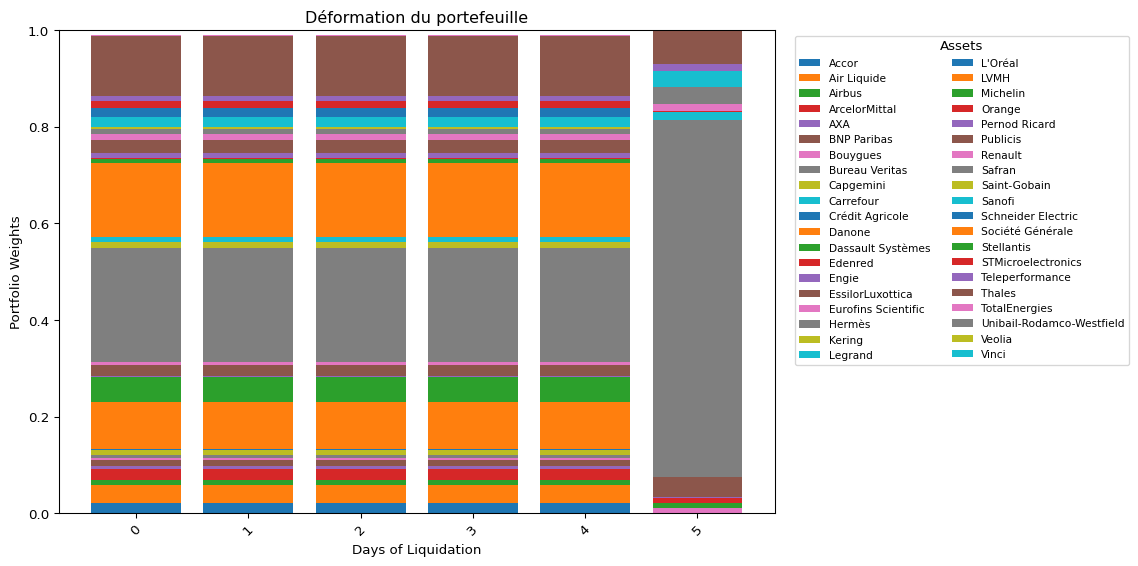

In [14]:
# Initialiser le graphique
plt.figure(figsize=(12, 6))

# Barplot empilé
bottom = None
for asset in weights.index:
    plt.bar(
        pd.to_numeric(weights.columns),  # Les jours
        weights.loc[asset],  # Poids de l'actif pour chaque jour
        bottom=bottom,  # Position de départ pour empiler les barres
        label=selected_assets[asset]  # Légende pour chaque actif
    )
    bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

plt.xlabel("Days of Liquidation")
plt.ylabel("Portfolio Weights")
plt.title("Déformation du portefeuille")
plt.xticks(rotation=45)
plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()

plt.show()

Pour un fond de droit français reglementé, on a pas le droit d’investir
plus de 5% du portefeuille dans une société. Exceptionnellement, pour
certains titre, on a le droit d’investir jusqu’à 10% du portefeuille, à
condition que les titres qui sont exposées à plus de 5% du portefeuille
ne dépassent pas 40% du portefeuille. C’est la règle des 5/10/40. C’est
un ratio réglementaire pour les OPC. Toutes les pertes réalisées en
raison du défaut de ce ratio doivent être supportées par la société de
gestion. Ces depassements doivent être déclarés à l’AMF. Dans notre cas,
ce ratio n’est pas respecté, l’équilibre du portefeuille est chamboulé.

In [15]:
# Valeur liquide du portefeuille
market_value_df = pd.DataFrame()

market_value_df["market_value"] = market_value.sum(axis=0)

# Calculer la valeur liquide relative par rapport au jour 0
market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]

# Calculer la valeur cumulée liquide relative du portefeuille
market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1

# Afficher le DataFrame résultant
print(market_value_df)

   market_value  relative value  cumulative value
0  6.010327e+09        1.000000          0.000000
1  1.202064e+09        0.200000          0.200000
2  1.202064e+09        0.200000          0.400000
3  1.202064e+09        0.200000          0.600000
4  1.202064e+09        0.200000          0.799999
5  1.202062e+09        0.200000          0.999999
6  6.753130e+03        0.000001          1.000000
7  0.000000e+00        0.000000          1.000000

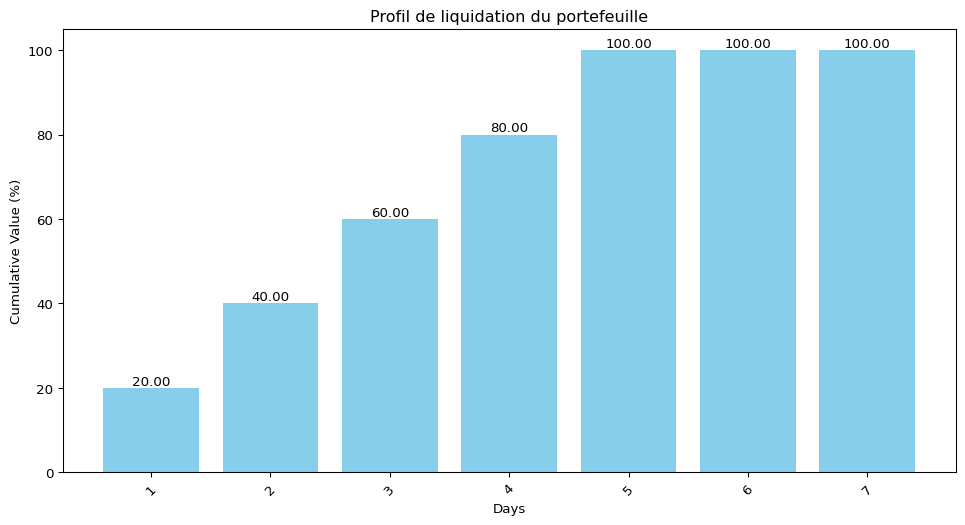

In [16]:
import matplotlib.pyplot as plt
market_value_df = market_value_df.iloc[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        height,  # Position slightly above the bar
        f'{height:.2f}',  # Format with 2 decimal places
        ha='center',  # Center horizontally
        va='bottom',  # Position text at the bottom
        fontsize=10, color="black"
    )

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Cumulative Value (%)")
plt.title("Profil de liquidation du portefeuille")
plt.xticks(rotation=45)

# Show the plot
plt.show()

Pour voir ce qui arrive au profil d’écoulement lorsque les quantités
varient, on va utiliser un facteur de modulation de la quantité. Cela
permet de déterminer quelle est la taille cible du portefeuille qui
permet d’avoir la liquidité pour un certain niveau en nombre de jours
qu’on se fixe. Cet exercice est fait une seule fois à l’initialisation
du portefeuille.

**La liquidité d’un portefeuille dépend de la liquidité intrinsèque des
titres et la quantité de titres.**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        ADV["Quantity liquidated"] += liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

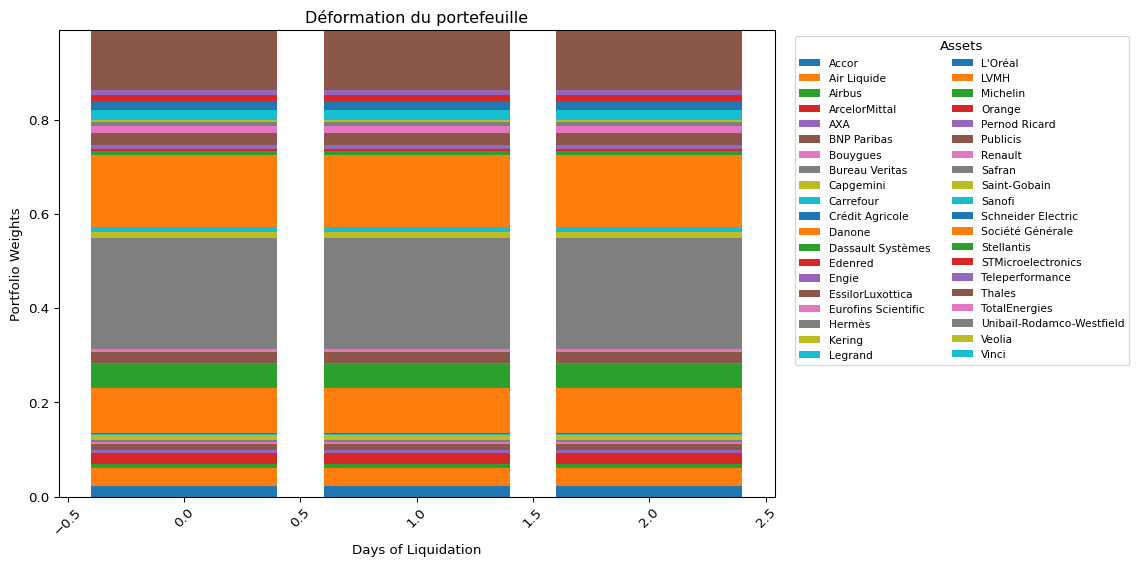

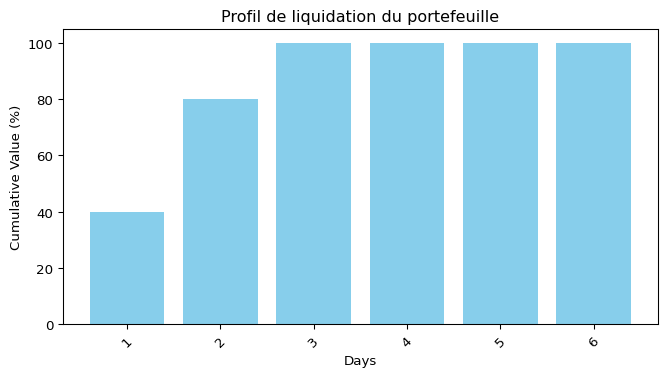

In [18]:
fact_modulation=0.5
nb_liquidation=6

new_market_value_df, new_market_value, new_weights = liquidation_profile(ADV, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

In [19]:
new_market_value.head()

### Sous conditions stressées avec déformation

Pour avoir des conditions stressées, on joue sur la quantité liquidable
en un jour et de fait sur la profondeur de marché. Pour des conditions
stressées à la baisse, on divise la profondeur de marché par 2. Pour des
conditions stressées à la hausse, on multiplie la profondeur de marché
par 2.

In [20]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}

ADV_stressed = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])

# Génération des quantités
np.random.seed(42)
ADV_stressed["Quantity"] =  round(1.5 * np.random.uniform(0, 1, size=len(ADV)) * ADV["ADV"])

# Quantité journalière
market_depth = (20/100)/2  # On stresse la liquidité
ADV_stressed["Quantity in 1day"] = round(ADV_stressed["Quantity"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV_stressed["Days of liquidation"] = ADV_stressed["Quantity"]/ADV_stressed["Quantity in 1day"]

# floor to 1 and round
ADV_stressed["Days of liquidation"] = ADV_stressed["Days of liquidation"].apply(lambda x: max(1, round(x)))

print(f"Temps de liquidation du portefeuille : {ADV_stressed['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 10 jours

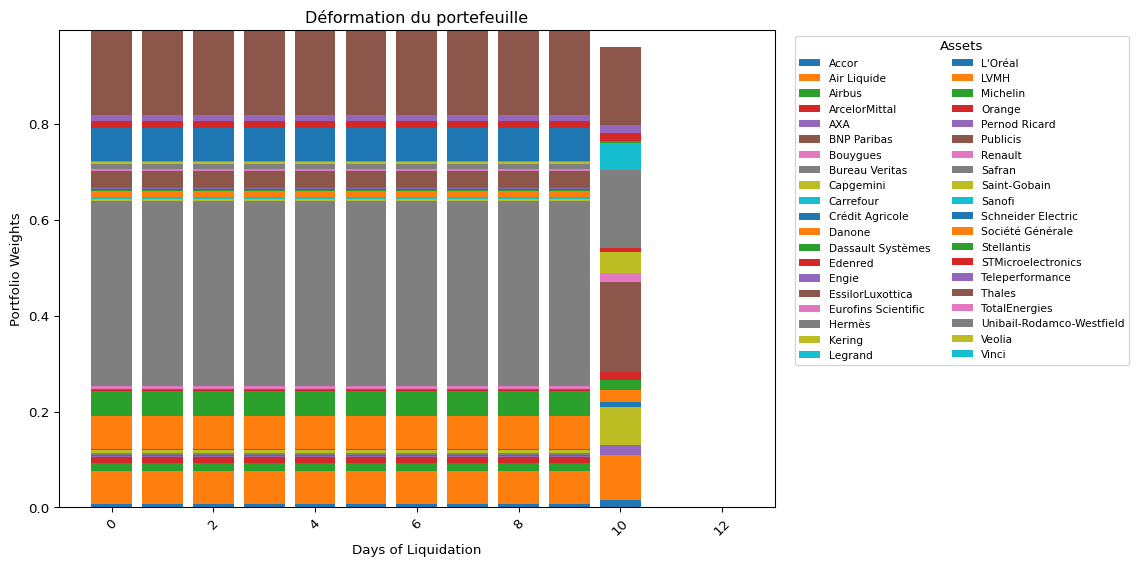

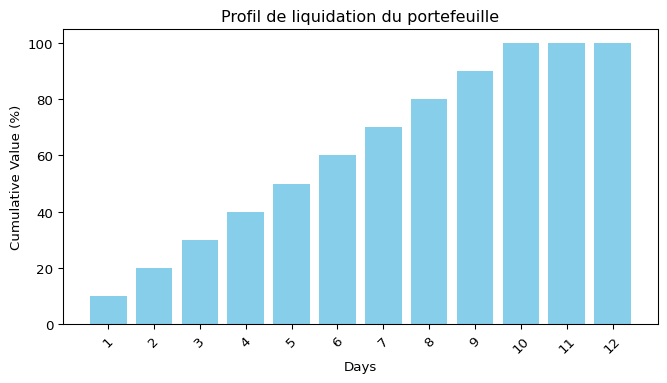

In [21]:
fact_modulation=1
nb_liquidation=12

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

## Absence de déformation du portefeuille (pro forma)

L’objectif est de conserver la distribution du portefeuille à mesure
qu’il se liquide. Tout d’abord, on estime la quantité liquidable à un
jour de chacun des titres comme fait précédemment. Celà permet d’avoir
le pourcentage liquidable en un jour.

Si on veut que le portefeuille se liquide à la même vitesse, il faut
aller à la vitesse du titre le plus lent. On peut calculer le
pourcentage liquidable en un jour pour chaque titre. On prendra le
minimum de ces pourcentages pour déterminer le pourcentage liquidable en
un jour du portefeuille.

Le portefeuille prend ainsi plus de temps à se liquider et fatalement,
le portefeuille finit par se déformer.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile_pro_forma(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):        
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        min_liquidated_today = (liquidated_today/ADV["Quantity in 1day"]).min() # On liquide à la vitesse de l'actif le moins liquide
        ADV["Quantity liquidated"] += min_liquidated_today*liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

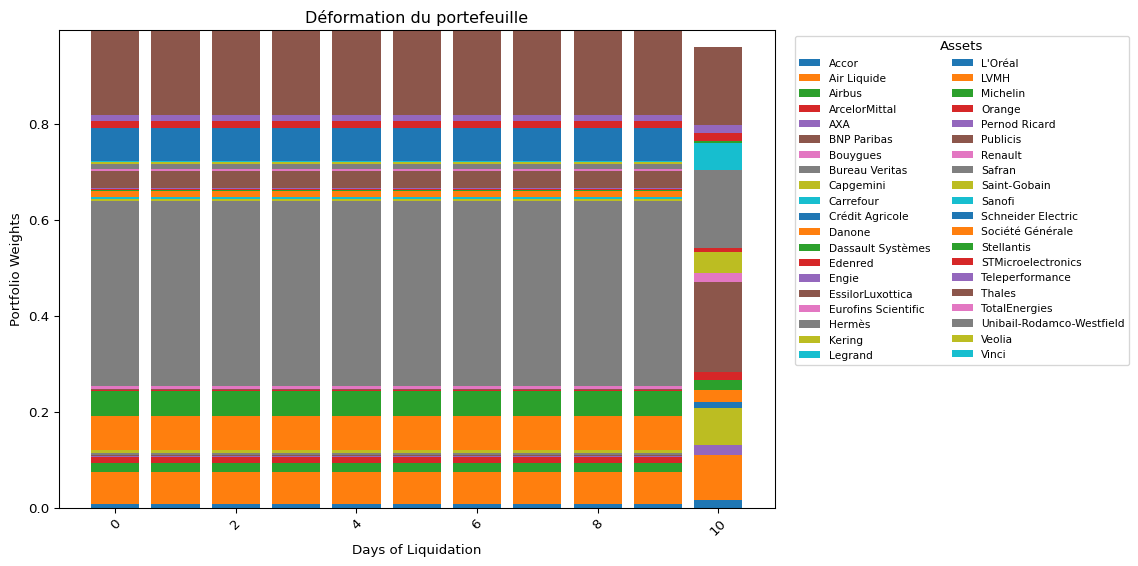

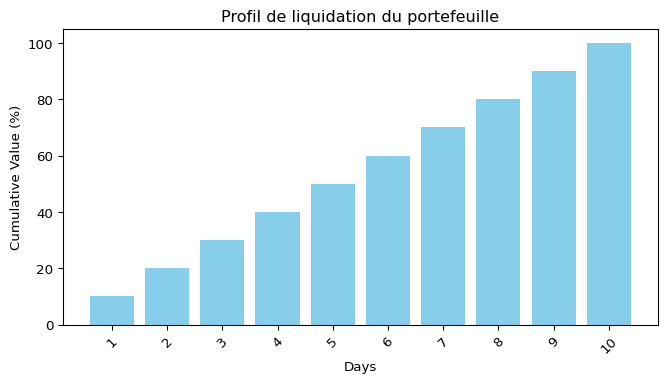

In [23]:
fact_modulation=1
nb_liquidation=10

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile_pro_forma(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

Pour gérer la liquidité d’un portefeuille et donc préserver la qualité
du portefeuille, on peut suspendre les souscriptions et les rachats par
des mécanismes émis par la loi. Les régulateurs des SGP annoncent que
les investisseurs annoncent que les indivdus ne peuvent plus souscrire
ou faire un rachat.

**Mécanismes de gestion de la liquidité**:

1.  **Les Gates** consistent à plafonner les rachats. Si les rachats
    totaux sont supérieures à 5% de l’actif net, la SGP a *le droit et
    non l’obligatoire* ne pas honorer les rachats de plus de 5%. Elle
    limite donc les rachats en un jour à 5% et ventiler le reste sur les
    jours suivants en fonction des conditions du marché. Cela permet de
    ne pas impacter le prix de façon considérable. C’est une mesure de
    protection des investisseurs restants. Les gates restent quand même
    un signal négatif pour les investisseurs restants. Ils permettent
    toutefois de mettre de l’ordre dans le portefeuille. L’AMF le fait
    figurer dans le prospectus, sauf si la SGP arrive à justifier
    qu’elle n’a pas besoin de le faire. *Il n’en demeure pas moins que
    l’activation des gates est optionnelle*